# Jaccard index computation between shape files
## Development version

This notebook illustrates the calculation of the Jaccard index between slums shape file and slighntly modified one denoting the municipality ground truth for the slums in Kalyan, India.

Python package imports

In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

import fiona
from fiona import collection as ficol
from descartes import PolygonPatch

from shapely.geometry import MultiPolygon, shape

Paths and filenames

In [3]:
# data paths
#TRUTH_SHAPE_PATH = "/home/elena/DynaSlum/Data/Kalyan/original/"
TEST_SHAPE_PATH = "/home/elena/DynaSlum/Data/Kalyan/test/"

# masks filename
slums_shape_fname = "slums_municipality_made_valid.shp"
test_shape_fname1 = "slums_municipality_modified1.shp" # some slums are removed
test_shape_fname2 = "slums_municipality_modified2.shp" # modified some nodes from slum boundaries

# masks full filenames
truth_slums_shape_fullfname = os.path.join(TEST_SHAPE_PATH, slums_shape_fname)
test_slums_shape_fullfname1 = os.path.join(TEST_SHAPE_PATH, test_shape_fname1)
test_slums_shape_fullfname2 = os.path.join(TEST_SHAPE_PATH, test_shape_fname2)

print("Full truth shape filename: ", truth_slums_shape_fullfname)
print("Full test shape filename1: ", test_slums_shape_fullfname1)
print("Full test shape filename2: ", test_slums_shape_fullfname2)

Full truth shape filename:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_made_valid.shp
Full test shape filename1:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_modified1.shp
Full test shape filename2:  /home/elena/DynaSlum/Data/Kalyan/test/slums_municipality_modified2.shp


Load data and display the bounds

In [4]:
fp = fiona.open(truth_slums_shape_fullfname)
bounds = fp.bounds
xmin, ymin, xmax, ymax = bounds
print("xmin: ", xmin, "xmax: ", xmax, "ymin: ", ymin, "ymax: ", ymax)
fp.close()

xmin:  297328.6765506615 xmax:  300732.35364115785 ymin:  2123671.144477916 ymax:  2127839.1117448886


Function to display a multipolygon from a shape file on a figure axis with with given color and extent

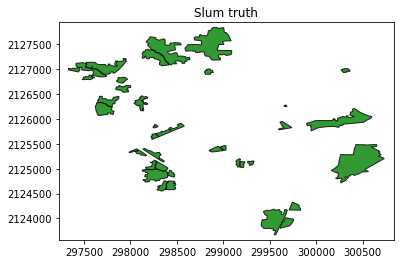

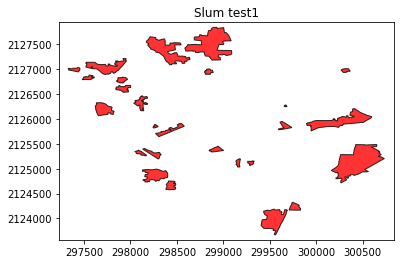

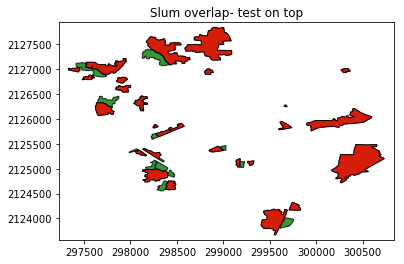

In [5]:
def show_multipolygon(filename, axis, extent, offset, color, alpha, title):
    xmin, ymin, xmax, ymax = extent
    
    with ficol(filename, "r") as input:
        for f in input:
            axis.add_patch(
            PolygonPatch(
                f['geometry'], fc=color, alpha=alpha ))
    axis.set_xlim(xmin - offset, xmax + offset) 
    axis.set_ylim(ymin - offset, ymax + offset)              
    axis.set_title(title)
    
    return axis

RED = '#FF0000'
GREEN = '#008000'
#BLUE = '#0000FF'
GOLD = '#FFD700'
MAGENTA = '#FF00FF'
offset = 100
alpha = 0.8
alpha_over = 0.5

#fig = plt.figure()
#_, (( ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex = True, sharey=True)
_, ax1 = plt.subplots()
_, ax2 = plt.subplots()
_,ax3 = plt.subplots()
ax1 = show_multipolygon(truth_slums_shape_fullfname, ax1, bounds, 100, GREEN, alpha,'Slum truth')
ax2 = show_multipolygon(test_slums_shape_fullfname1, ax2, bounds, 100, RED, alpha,'Slum test1')
ax3 = show_multipolygon(truth_slums_shape_fullfname, ax3, bounds, 100, GREEN, alpha,'')
ax3 = show_multipolygon(test_slums_shape_fullfname1, ax3, bounds, 100, RED, alpha, 'Slum overlap- test on top')

plt.show();



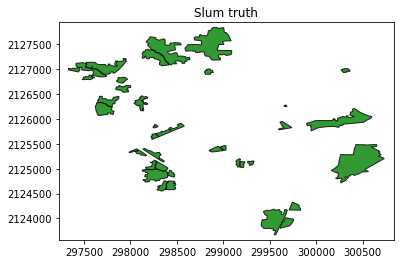

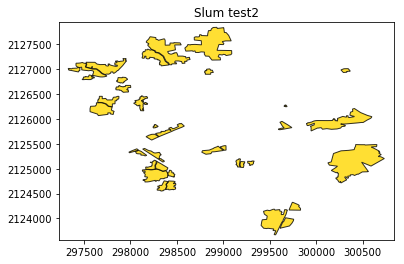

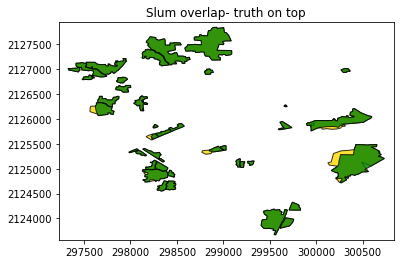

In [6]:
_, ax4 = plt.subplots()
_, ax5 = plt.subplots()
_,ax6 = plt.subplots()
ax4 = show_multipolygon(truth_slums_shape_fullfname, ax4, bounds, 100, GREEN, alpha,'Slum truth')
ax5 = show_multipolygon(test_slums_shape_fullfname2, ax5, bounds, 100, GOLD, alpha,'Slum test2')
ax6 = show_multipolygon(test_slums_shape_fullfname2, ax6, bounds, 100, GOLD, alpha, '')
ax6 = show_multipolygon(truth_slums_shape_fullfname, ax6, bounds, 100, GREEN, alpha,'Slum overlap- truth on top')

plt.show();

Load the contents of the shapefiles as multipolygons.

In [7]:
truth_multi = MultiPolygon([shape(pol['geometry']) for pol in fiona.open(truth_slums_shape_fullfname)])
#print(truth_multi)
test1_multi = MultiPolygon([shape(pol['geometry']) for pol in fiona.open(test_slums_shape_fullfname1)])
#print(test1_multi)
test2_multi = MultiPolygon([shape(pol['geometry']) for pol in fiona.open(test_slums_shape_fullfname2)])
#print(test2_multi)

Verify if the multipolygons are valid.

In [8]:
print(truth_multi.is_valid)
#union = truth_multi.union(test1_multi).area

True


In [9]:
print(test1_multi.is_valid)

True


In [10]:
print(test2_multi.is_valid)

True


Calculate the Jaccard index between few combinaitons of slum multipolygons. including a multipolygon with itself.

In [11]:
union_truth = truth_multi.union(truth_multi).area
print("The area of the union (truth, truth): ", union_truth)
inters_truth = truth_multi.intersection(truth_multi).area
print("The area of the intersection (truth, truth): ", inters_truth)
JI_truth = inters_truth/union_truth
print("The Jaccard Index between multipolygon 'truth' and itself': ", JI_truth)

The area of the union (truth, truth):  1145623.398825962
The area of the intersection (truth, truth):  1145623.398825962
The Jaccard Index between multipolygon 'truth' and itself':  1.0


In [12]:
union_truth_1 = truth_multi.union(test1_multi).area
print("The area of the union (truth, test1): ", union_truth_1)
inters_truth_1 = truth_multi.intersection(test1_multi).area
print("The area of the intersection (truth, test1): ", inters_truth_1)
JI_truth_1 = inters_truth_1/union_truth_1
print("The Jaccard Index between multipolygons 'truth' and 'test1': ", JI_truth_1)

The area of the union (truth, test1):  1145657.5116051915
The area of the intersection (truth, test1):  976581.8455873412
The Jaccard Index between multipolygons 'truth' and 'test1':  0.8524204098474798


In [13]:
union_truth_2 = truth_multi.union(test2_multi).area
print("The area of the union (truth, test2): ", union_truth_2)
inters_truth_2 = truth_multi.intersection(test2_multi).area
print("The area of the intersection (truth, test2: ", inters_truth_2)
JI_truth_2 = inters_truth_2/union_truth_2
print("The Jaccard Index between multipolygons 'truth' and 'test2': ", JI_truth_2)

The area of the union (truth, test2):  1216944.6700501733
The area of the intersection (truth, test2:  1138825.6830716261
The Jaccard Index between multipolygons 'truth' and 'test2':  0.9358072812173733


In [14]:
union_test_12 = test1_multi.union(test2_multi).area
print("The area of the union (test1, test2): ", union_test_12)
inters_test_12 = test1_multi.intersection(test2_multi).area
print("The area of the intersection (test1, test2: ", inters_test_12)
JI_test_12 = inters_test_12/union_test_12
print("The Jaccard Index between multipolygons 'test1' and 'test2': ", JI_test_12)

The area of the union (test1, test2):  1216241.1666230403
The area of the intersection (test1, test2:  970521.7460393753
The Jaccard Index between multipolygons 'test1' and 'test2':  0.7979681766027388
